# Importing packages

In [137]:
#Install packages usefull for this workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from pandas_datareader import wb
import ipywidgets as widgets

# Selecintg countries, indicators and cleaning data

In [138]:
# a: Select countries

In [139]:
countries = ['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 'PRY', 'PER', 'VEN', 'URY', 'SUR']

In [140]:
# b: Select indiacators: GDP per capita and Energy use

In [141]:
euse = wb.download(indicator='EG.USE.PCAP.KG.OE', country=countries, start=1971, end=2014)
euse.head(3)

gdp = wb.download(indicator='NY.GDP.PCAP.KD', country=countries, start=1971, end=2014)
gdp.head(3)

NY.GDP.PCAP.KD
country   year                
Argentina 2014    10323.206940
          2013    10699.197716
          2012    10557.885389

For further analysis
cpi = wb.download(indicator='FP.CPI.TOTL', country=countries, start=1971, end=2014)
cpi.head(3)

In [142]:
# c: Merging the two data sets retaining the indicators 

In [143]:
joiningdata = pd.merge(euse,gdp, how='inner', on=['country','year'])
joiningdata = joiningdata.reset_index()
joiningdata = joiningdata.rename(columns = {'country' : 'countries', 
                                            'EG.USE.PCAP.KG.OE' : 'euse', 
                                            'NY.GDP.PCAP.KD' : 'gdp'})

joiningdata['year'] = joiningdata.year.astype(float)

In [144]:
# d: Sorting data

In [145]:
joiningdata.sort_values(by=['countries','year'], inplace=True)
joiningdata = joiningdata.reset_index(drop = True)

#Quick overview of the data
joiningdata.head(20)

,countries,year,euse,gdp
0,Argentina,1971.0,1380.921398,7335.759136
1,Argentina,1972.0,1379.818923,7329.921158
2,Argentina,1973.0,1411.496781,7407.366754
3,Argentina,1974.0,1415.682954,7685.857212
4,Argentina,1975.0,1378.546993,7559.143749
5,Argentina,1976.0,1404.744778,7291.840429
6,Argentina,1977.0,1420.567765,7681.017571
7,Argentina,1978.0,1426.919260,7227.564124
8,Argentina,1979.0,1484.565823,7849.363340
9,Argentina,1980.0,1487.617079,7849.115971


## Deleting countries (rows) with missing data. 
We ensure that rows has been deleted by checking number of observations before and after

In [146]:
print(f'before: {joiningdata.shape[0]} observations, {joiningdata.shape[1]} variables')
for val in ['Guyana', 'Suriname']: 
    I = joiningdata.countries.str.contains(val)
    joiningdata.drop(joiningdata[I].index, inplace=True)
print(f'after: {joiningdata.shape[0]} observations, {joiningdata.shape[1]} variables')

before: 528 observations, 4 variables
after: 440 observations, 4 variables


Checking relevant descriptive statistics

In [147]:
joiningdata.groupby('countries').mean()

,year,euse,gdp
countries,,,
Argentina,1992.5,1577.821307,8038.279267
Bolivia,1992.5,469.526977,1630.257096
Brazil,1992.5,1033.796172,8567.851994
Chile,1992.5,1277.436140,7934.020545
Colombia,1992.5,660.678585,4618.023011
Ecuador,1992.5,638.038425,3887.789092
Paraguay,1992.5,694.451297,3394.018057
Peru,1992.5,551.234617,3723.383196
Uruguay,1992.5,902.129600,8172.112245


# Analysis
The data set is cleaned. We begin the analysis of investigating the relationship between economic growth and energy use.

## First we look at economic growth. 
### GDP pr Capita

In [148]:
# Calculate percentage change in gdp
joiningdata['gdp_pct'] = joiningdata.groupby('countries')['gdp'].pct_change() *100

In [149]:
# Economic growth
# Creating a column containing the value of gdp for each country year 1971
joiningdata_2=joiningdata.copy()
joiningdata_grouped = joiningdata_2.groupby('countries')
joiningdata_grouped_first = joiningdata_grouped.gdp.first()
joiningdata_grouped_first.name = 'first'

# The column is added to joiningdata_2.
joiningdata_2.set_index(['countries','year'],inplace=True)
joiningdata_2 = joiningdata_2.join(joiningdata_grouped_first)
joiningdata_2.reset_index(inplace=True)

In [150]:
# Creating a column containing the value of gdp for each country year 2014
joiningdata_grouped_last = joiningdata_grouped.gdp.last()
joiningdata_grouped_last.name = 'last'

# The column is added to joiningdata_2.
joiningdata_2.set_index(['countries','year'],inplace=True)
joiningdata_2 = joiningdata_2.join(joiningdata_grouped_last)
joiningdata_2.reset_index(inplace=True)

# Calculating the economic growth for each country in the period 1971-2014
joiningdata_2['growth_gdp'] = joiningdata_2['last']/joiningdata_2['first']*100

In [151]:
#Table showing the total gdp growth rate for each country
joiningdata_mean=joiningdata_2.groupby('countries').mean().copy()
joiningdata_mean.drop(['year', 'euse', 'gdp', 'gdp_pct', 'first', 'last'],axis=1,inplace=True)
joiningdata_mean

# Sorting data:
#Tilføj navne
joiningdata_mean.sort_values(by=['growth_gdp'], inplace=True)
joiningdata_mean = joiningdata_mean.reset_index()

In [152]:
joiningdata_mean

,countries,growth_gdp
0,"Venezuela, RB",97.123477
1,Argentina,140.724453
2,Bolivia,161.693689
3,Peru,169.172403
4,Ecuador,211.370857
5,Brazil,232.311111
6,Uruguay,245.714679
7,Colombia,252.604067
8,Paraguay,275.215844
9,Chile,293.591635


As can be seen Chile, Paraguay, Columbia, Uruguay and Brazil have the highest growth in gdp over the 44 years.
The five countries are represented below

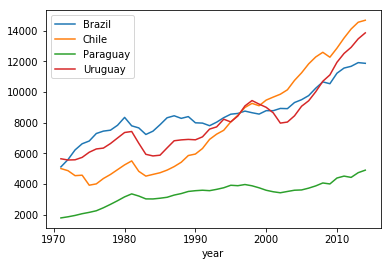

In [153]:
top5_gdp = joiningdata_2[joiningdata_2["countries"].isin(['Chile', 'Paraguay', 'Columbia', 'Uruguay', 'Brazil'])]

def plot(fig):
    fig_gdp_change = fig.set_index('year')
    fig_gdp_change.groupby(['countries'])['gdp'].plot(legend=True);

plot(top5_gdp)

## We conduct the same analysis for energy use
### Energy use

In [154]:
# Creating a column containing the value of energy use for each country year 1971
joiningdata_3=joiningdata.copy()
joiningdata_grouped = joiningdata_3.groupby('countries')
joiningdata_grouped_first = joiningdata_grouped.euse.first()
joiningdata_grouped_first.name = 'first'

# The column is added to joiningdata_2.
joiningdata_3.set_index(['countries','year'],inplace=True)
joiningdata_3 = joiningdata_3.join(joiningdata_grouped_first)
joiningdata_3.reset_index(inplace=True)


# Creating a column containing the value of gdp for each country year 2014
joiningdata_grouped_last = joiningdata_grouped.euse.last()
joiningdata_grouped_last.name = 'last'

# The column is added to joiningdata_2.
joiningdata_3.set_index(['countries','year'],inplace=True)
joiningdata_3 = joiningdata_3.join(joiningdata_grouped_last)
joiningdata_3.reset_index(inplace=True)

# Calculating the economic growth for each country in the period 1971-2014
joiningdata_3['growth_euse'] = joiningdata_3['last']/joiningdata_3['first']*100

In [155]:
#Table showing the total gdp growth rate for each country
joiningdata_mean=joiningdata_3.groupby('countries').mean().copy()
joiningdata_mean.drop(['year', 'euse', 'gdp', 'gdp_pct', 'first', 'last'],axis=1,inplace=True)
joiningdata_mean

# Sorting data:
joiningdata_mean.sort_values(by=['growth_euse'], inplace=True)
joiningdata_mean = joiningdata_mean.reset_index()

joiningdata_mean

,countries,growth_euse
0,Peru,115.255741
1,Colombia,116.160964
2,Argentina,145.930612
3,Paraguay,146.119363
4,"Venezuela, RB",151.692850
5,Uruguay,160.720944
6,Brazil,207.961710
7,Chile,229.489047
8,Ecuador,249.092396
9,Bolivia,355.559299


As seen in the table the 5 countries with the highest growth of energy use is Bolivia, Ecuador, Chile, Brazil and Uruguay.

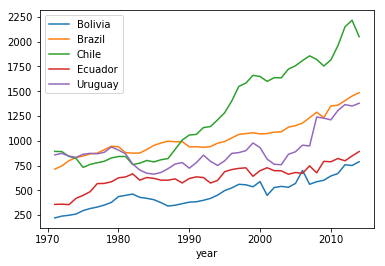

In [156]:
top5_euse = joiningdata_2[joiningdata_2["countries"].isin(['Bolivia', 'Ecuador', 'Chile', 'Brazil', 'Uruguay'])]

def plot(fig):
    fig_gdp_change = fig.set_index('year')
    fig_gdp_change.groupby(['countries'])['euse'].plot(legend=True);

plot(top5_euse)

# Conclusion

This was a quick ad hoc analysis of the relationship between energy consumption and economic growth. As we saw, the five countries that have the highest economic growth is not the same countries that experienced the largest rise in energy consumption. However, soe of the countries are the same and a further analysis could be conducted using appropriate econometric methods as more relevant variables.